In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
from operator import itemgetter
import math
vdfx = pd.read_csv("../csv/vivado_matrixmul.csv", index_col=0)
cdfx = pd.read_csv("../csv/catapult_matmul_latency.csv", index_col=0)
li=[]
viv_violin=pd.read_csv("../csv/vivado_matrixmul_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_matmul_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True,sort='False')
l2=[]
l2.append(violin)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = cdfx['ff'].min()*1/cdfx['ff']
vdfx['ff_inv'] = cdfx['ff'].min()*1/vdfx['ff']
cdfx['lut_inv'] = cdfx['lut'].min()*1/cdfx['lut']
vdfx['lut_inv'] = cdfx['lut'].min()*1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns
cdfx['mem_partition_size'] = cdfx['knob_DATA_BLOCK']/1048576
vdfx['mem_partition_size'] = vdfx['knob_PARTITION_FACTOR']
cdfx = cdfx.drop(columns=['B'])
cdfx = cdfx.drop(columns=['knob_MAT_SIZE'])
cdfx = cdfx.drop(columns=['knob_DATA_BLOCK'])
vdfx = vdfx.drop(columns=['knob_PARTITION_FACTOR'])

Text(0.5, 1.0, 'Matrix Multiplication Combined Design Space')

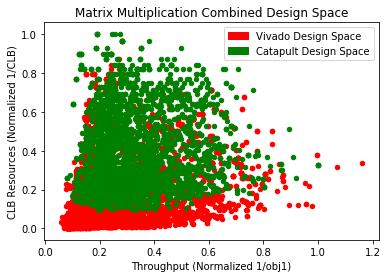

In [2]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Matrix Multiplication Combined Design Space")

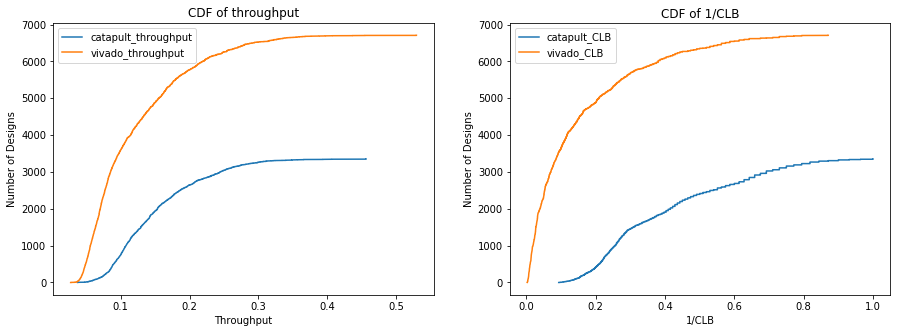

In [3]:
cdfx['1/obj1']=1/cdfx['obj1']
vdfx['1/obj1']=1/vdfx['obj1']

sorted_data_cat=np.sort(cdfx['1/obj1'])
sorted_data_viv=np.sort(vdfx['1/obj1'])
sorted_data_cat2=np.sort(cdfx['1/obj2'])
sorted_data_viv2=np.sort(vdfx['1/obj2'])
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.step(np.concatenate([sorted_data_cat, sorted_data_cat[[-1]]]),np.arange(sorted_data_cat.size+1),label='catapult_throughput')
plt.step(np.concatenate([sorted_data_viv, sorted_data_viv[[-1]]]),np.arange(sorted_data_viv.size+1),label='vivado_throughput')
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title('CDF of throughput')

plt.legend()
plt.subplot(1,2,2)
plt.step(np.concatenate([sorted_data_cat2, sorted_data_cat2[[-1]]]),np.arange(sorted_data_cat2.size+1),label='catapult_CLB')
plt.step(np.concatenate([sorted_data_viv2, sorted_data_viv2[[-1]]]),np.arange(sorted_data_viv2.size+1),label='vivado_CLB')
plt.xlabel('1/CLB')
plt.ylabel('Number of Designs')
plt.title('CDF of 1/CLB')

plt.legend()

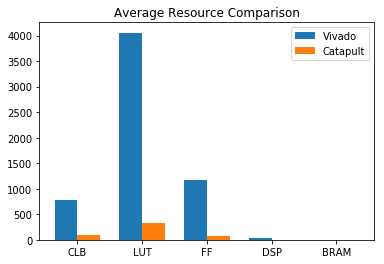

In [4]:
fig, ax = plt.subplots()

N=5
vivado_val=(vdfx['obj2'].mean(),vdfx['lut'].mean(),vdfx['ff'].mean(),vdfx['dsp'].mean(),vdfx['bram'].mean())
catapult_val=(cdfx['obj2'].mean(),cdfx['lut'].mean(),cdfx['ff'].mean(),cdfx['dsp'].mean(),cdfx['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,vivado_val,width,label='vivado')
p2=ax.bar(ind+width,catapult_val,width,label='catapult')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'))

ax.autoscale_view()
plt.show()

Text(0.5, 1.0, 'Resource Distribution')

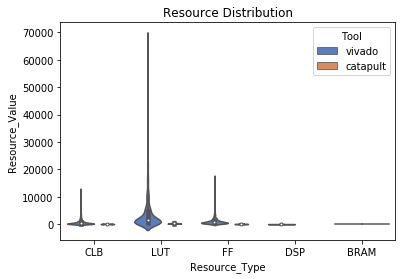

In [5]:
ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Tool",
                    data=violin, palette="muted",
                    scale="count")
plt.title("Resource Distribution")

0.2604694550550218 0.3320529746924241


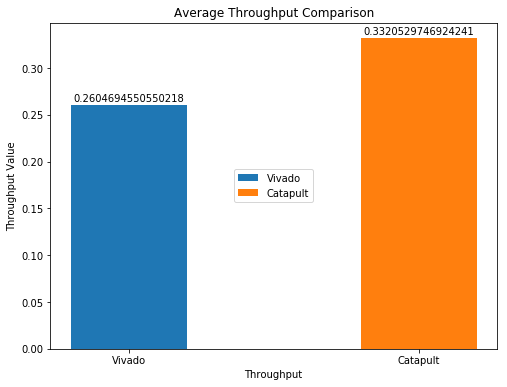

In [6]:
fig, ax = plt.subplots()

N=1
vivado_val=(vdfx['throughput'].mean())
catapult_val=(cdfx['throughput'].mean())
print(vivado_val,catapult_val)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.set_size_inches(8, 6, forward=True)
ind1=[0,0.025]
width = 0.01 
labels=['Vivado','Catapult']
p1=ax.bar(0,vivado_val,width,label='vivado')
p2=ax.bar(0.025,catapult_val,width,label='catapult')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')
ax.set_ylabel('Throughput Value')
ax.set_xticks(ind1)
ax.set_xticklabels(labels)

autolabel(p1)
autolabel(p2)
ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'),loc="center")



plt.show()

Text(0.5, 1.0, 'Throughput Distribution')

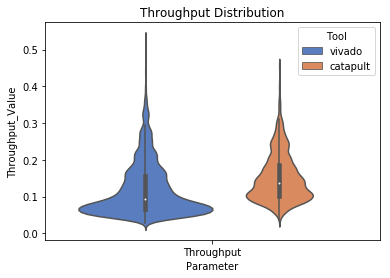

In [7]:
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Tool",palette="muted",scale="count")
plt.title("Throughput Distribution")

In [8]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_UNROLL_FACTOR1','knob_UNROLL_FACTOR2','knob_UNROLL_FACTOR3', 'knob_SUBDIM_X', 'knob_SUBDIM_Y'], how='inner')

(0, 1)

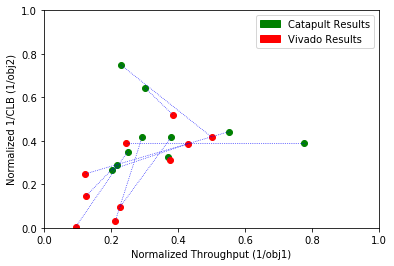

In [9]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 1)

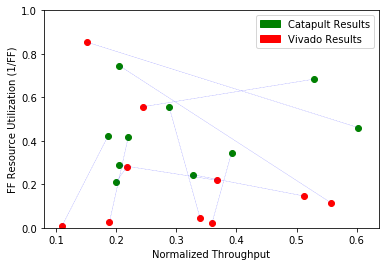

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 1)

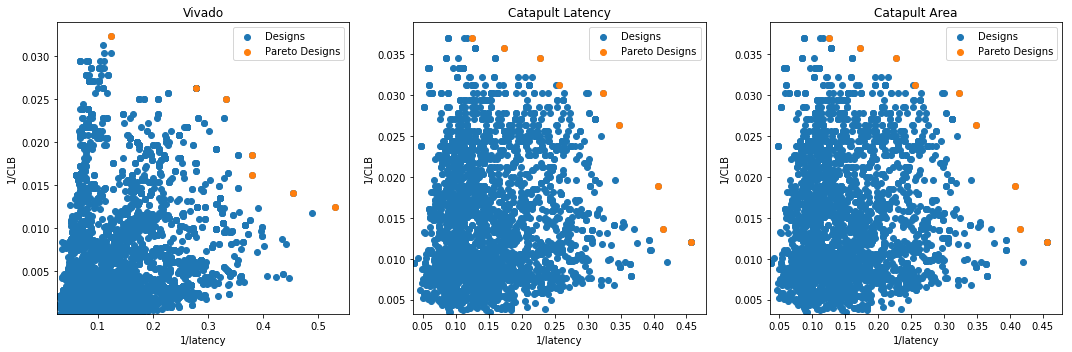

In [11]:
sys.path.append('./pareto_files')
from utils import adrs, read_design_space, approximate_pareto


X1, y1, _, names1, _ = read_design_space('../csv/vivado_matrixmul_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X2, y2, _, names2, _ = read_design_space('../csv/catapult_matmul_latency_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X3, y3, _, names3, _ = read_design_space('../csv/catapult_matmul_area_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)



plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
y_pareto1 = approximate_pareto(y1)[0]
y_pareto1_index = approximate_pareto(y1)[1]
plt.scatter(y1[:,0], y1[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],label='Pareto Designs')
plt.legend()
plt.title("Vivado")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y1[:,0].min()*0.95, right=y1[:,0].max()*1.05)
plt.ylim(bottom=y1[:,1].min()*0.95, top=y1[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,2)
y_pareto2 = approximate_pareto(y2)[0]
y_pareto2_index = approximate_pareto(y2)[1]
plt.scatter(y2[:,0], y2[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Latency")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y2[:,0].min()*0.95, right=y2[:,0].max()*1.05)
plt.ylim(bottom=y2[:,1].min()*0.95, top=y2[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,3)
y_pareto3 = approximate_pareto(y3)[0]
y_pareto3_index = approximate_pareto(y3)[1]
plt.scatter(y3[:,0], y3[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Area")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y3[:,0].min()*0.95, right=y3[:,0].max()*1.05)
plt.ylim(bottom=y3[:,1].min()*0.95, top=y3[:,1].max()*1.05)
plt.tight_layout()

(0.0, 0.0484225681834366)

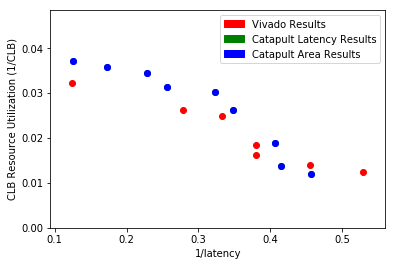

In [12]:
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],c='r')
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],c='b')


red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
blue_data=mpatches.Patch(color='blue',label='Catapult Area Results')
plt.legend(handles=[red_data, green_data,blue_data])
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')
plt.ylim(0.000)

In [13]:
vivdfx = pd.read_csv("../csv/vivado_matrixmul_sherlock.csv", index_col=0)
c_latdfx = pd.read_csv("../csv/catapult_matmul_latency_sherlock.csv", index_col=0)
c_areadfx = pd.read_csv("../csv/catapult_matmul_area_sherlock.csv", index_col=0)


In [14]:
y_pareto1_sorted=[]
y_pareto2_sorted=[]
y_pareto3_sorted=[]
for i in range(len(y_pareto1_index)):
    y_pareto1_sorted.append((i,y_pareto1[i][0],y_pareto1[i][1]))
y_pareto1_sorted=sorted(y_pareto1_sorted, key=itemgetter(2))

for i in range(len(y_pareto2_index)):
    y_pareto2_sorted.append((i,y_pareto2[i][0],y_pareto2[i][1]))
y_pareto2_sorted=sorted(y_pareto2_sorted, key=itemgetter(2))

for i in range(len(y_pareto3_index)):
    y_pareto3_sorted.append((i,y_pareto3[i][0],y_pareto3[i][1]))
y_pareto3_sorted=sorted(y_pareto3_sorted, key=itemgetter(2))

In [15]:
def euclid(a,b,c,d):
    t=math.sqrt(((a-b)**2)+((c-d)**2))
    return t

In [16]:
viv_esp=0.01
c_lat_esp=0.01
c_area_esp=0.01

In [17]:
vivdfx_copy=vivdfx.copy()
for i in y_pareto1_index:
    vivdfx_copy=vivdfx_copy.drop(index=i)
viv_pts=[]
for i in range(len(y_pareto1_index)):
    for index,row in vivdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])<viv_esp:
            if index in viv_pts:
                pass
            else:
                viv_pts.append(index)

c_latdfx_copy=c_latdfx.copy()
for i in y_pareto2_index:
    c_latdfx_copy=c_latdfx_copy.drop(index=i)
c_lat_pts=[]
for i in range(len(y_pareto2_index)):
    for index,row in c_latdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])<c_lat_esp:
            if index in c_lat_pts:
                pass
            else:
                c_lat_pts.append(index)
                
                
c_areadfx_copy=c_areadfx.copy()
for i in y_pareto3_index:
    c_areadfx_copy=c_areadfx_copy.drop(index=i)
c_area_pts=[]
for i in range(len(y_pareto3_index)):
    for index,row in c_areadfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])<c_area_esp:
            if index in c_area_pts:
                pass
            else:
                c_area_pts.append(index)

In [18]:
li=[]
for i in y_pareto1_index:
    t1=c_latdfx.loc[(c_latdfx["knob_SUBDIM_X"]==vivdfx.loc[i]["knob_SUBDIM_X"]) & (c_latdfx["knob_SUBDIM_Y"]==vivdfx.loc[i]["knob_SUBDIM_Y"])& (c_latdfx["knob_UNROLL_FACTOR1"]==vivdfx.loc[i]["knob_UNROLL_FACTOR1"])& (c_latdfx["knob_UNROLL_FACTOR2"]==vivdfx.loc[i]["knob_UNROLL_FACTOR2"])& (c_latdfx["knob_UNROLL_FACTOR3"]==vivdfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx["knob_DATA_BLOCK"]*vivdfx.loc[i]["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_areadfx.loc[(c_areadfx["knob_SUBDIM_X"]==vivdfx.loc[i]["knob_SUBDIM_X"]) & (c_areadfx["knob_SUBDIM_Y"]==vivdfx.loc[i]["knob_SUBDIM_Y"])& (c_areadfx["knob_UNROLL_FACTOR1"]==vivdfx.loc[i]["knob_UNROLL_FACTOR1"])& (c_areadfx["knob_UNROLL_FACTOR2"]==vivdfx.loc[i]["knob_UNROLL_FACTOR2"])& (c_areadfx["knob_UNROLL_FACTOR3"]==vivdfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx["knob_DATA_BLOCK"]*vivdfx.loc[i]["knob_PARTITION_FACTOR"]==1048576)]
    li.append((t1,i,t2))
li2=[]
for i in viv_pts:
    t1=c_latdfx.loc[(c_latdfx["knob_SUBDIM_X"]==vivdfx_copy.loc[i]["knob_SUBDIM_X"]) & (c_latdfx["knob_SUBDIM_Y"]==vivdfx_copy.loc[i]["knob_SUBDIM_Y"])& (c_latdfx["knob_UNROLL_FACTOR1"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (c_latdfx["knob_UNROLL_FACTOR2"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (c_latdfx["knob_UNROLL_FACTOR3"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx["knob_DATA_BLOCK"]*vivdfx_copy.loc[i]["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_areadfx.loc[(c_areadfx["knob_SUBDIM_X"]==vivdfx_copy.loc[i]["knob_SUBDIM_X"]) & (c_areadfx["knob_SUBDIM_Y"]==vivdfx_copy.loc[i]["knob_SUBDIM_Y"])& (c_areadfx["knob_UNROLL_FACTOR1"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (c_areadfx["knob_UNROLL_FACTOR2"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (c_areadfx["knob_UNROLL_FACTOR3"]==vivdfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx["knob_DATA_BLOCK"]*vivdfx_copy.loc[i]["knob_PARTITION_FACTOR"]==1048576)]
    li2.append((t1,i,t2))    


Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

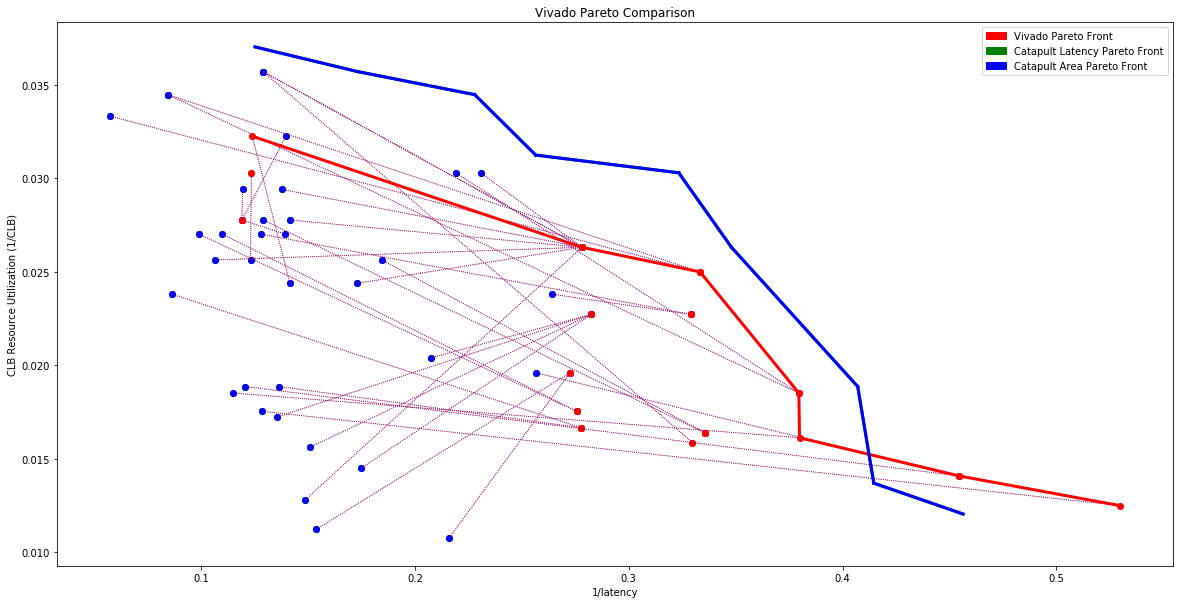

In [19]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    plt.scatter(x=y_pareto1[i][0], y=y_pareto1[i][1], c='r')
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.scatter(x=1/(a[0][8]), y=1/(a[0][9]), c='g') 
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto1[i][0], 1/(a[0][8])],[y_pareto1[i][1], 1/a[0][9]],'b:',linewidth=0.8)
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto1[i][0], 1/(b[0][8])],[y_pareto1[i][1], 1/b[0][9]],'r:',linewidth=0.8)
        
for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/vivdfx_copy.loc[li2[i][1]]['obj1'], y=1/vivdfx_copy.loc[li2[i][1]]['obj2'], c='r')
        plt.scatter(x=1/(a[0][8]), y=1/(a[0][9]), c='g') 
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/vivdfx_copy.loc[li2[i][1]]['obj1'], y=1/vivdfx_copy.loc[li2[i][1]]['obj2'], c='r')
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/vivdfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][8])],[1/vivdfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][9]],'b:',linewidth=0.8)
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/vivdfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/vivdfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)        


for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'red',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
red_data = mpatches.Patch(color='red', label='Vivado Pareto Front ')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Vivado Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')



In [20]:
li=[]
for i in y_pareto2_index:
    t1=vivdfx.loc[(vivdfx["knob_SUBDIM_X"]==c_latdfx.loc[i]["knob_SUBDIM_X"]) & (vivdfx["knob_SUBDIM_Y"]==c_latdfx.loc[i]["knob_SUBDIM_Y"])& (vivdfx["knob_UNROLL_FACTOR1"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR1"])& (vivdfx["knob_UNROLL_FACTOR2"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR2"])& (vivdfx["knob_UNROLL_FACTOR3"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx.loc[i]["knob_DATA_BLOCK"]*vivdfx["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_areadfx.loc[(c_areadfx["knob_SUBDIM_X"]==c_latdfx.loc[i]["knob_SUBDIM_X"]) & (c_areadfx["knob_SUBDIM_Y"]==c_latdfx.loc[i]["knob_SUBDIM_Y"])& (c_areadfx["knob_UNROLL_FACTOR1"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR1"])& (c_areadfx["knob_UNROLL_FACTOR2"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR2"])& (c_areadfx["knob_UNROLL_FACTOR3"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx["knob_DATA_BLOCK"]==c_latdfx.loc[i]["knob_DATA_BLOCK"])]
    li.append((t1,i,t2))
    
li2=[]
for i in c_lat_pts:
    t1=vivdfx.loc[(vivdfx["knob_SUBDIM_X"]==c_latdfx_copy.loc[i]["knob_SUBDIM_X"]) & (vivdfx["knob_SUBDIM_Y"]==c_latdfx_copy.loc[i]["knob_SUBDIM_Y"])& (vivdfx["knob_UNROLL_FACTOR1"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (vivdfx["knob_UNROLL_FACTOR2"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (vivdfx["knob_UNROLL_FACTOR3"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx_copy.loc[i]["knob_DATA_BLOCK"]*vivdfx["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_areadfx.loc[(c_areadfx["knob_SUBDIM_X"]==c_latdfx_copy.loc[i]["knob_SUBDIM_X"]) & (c_areadfx["knob_SUBDIM_Y"]==c_latdfx_copy.loc[i]["knob_SUBDIM_Y"])& (c_areadfx["knob_UNROLL_FACTOR1"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (c_areadfx["knob_UNROLL_FACTOR2"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (c_areadfx["knob_UNROLL_FACTOR3"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx["knob_DATA_BLOCK"]==c_latdfx_copy.loc[i]["knob_DATA_BLOCK"])]
    li2.append((t1,i,t2))

Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

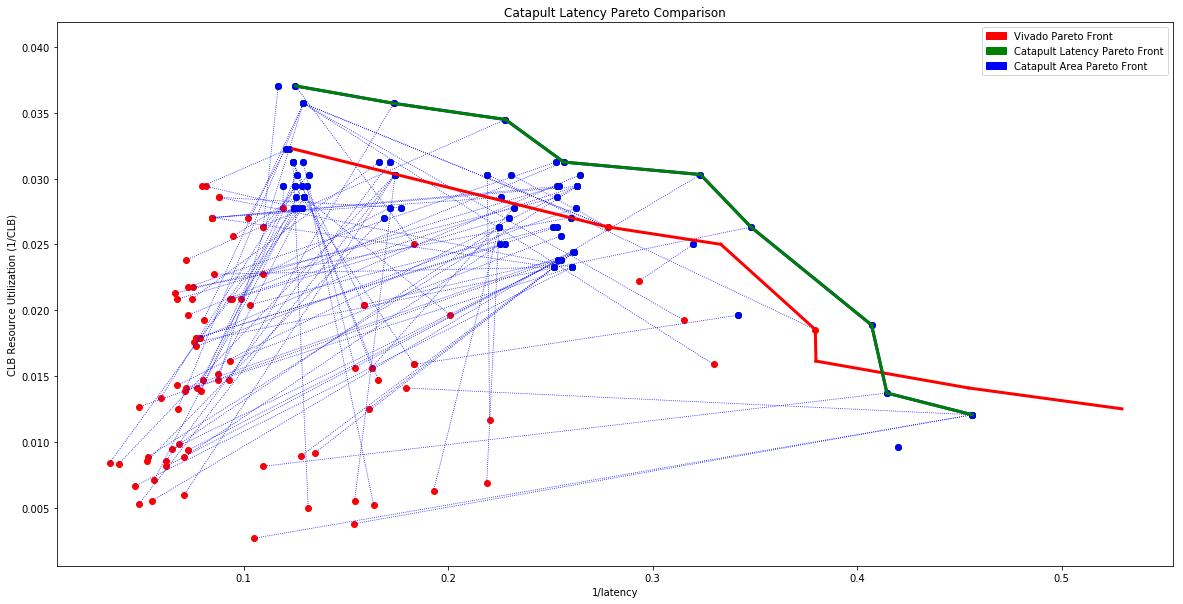

In [21]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.scatter(x=y_pareto2[i][0], y=y_pareto2[i][1], c='g')
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.scatter(x=y_pareto2[i][0], y=y_pareto2[i][1], c='g')        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto2[i][0], 1/(a[0][6])],[y_pareto2[i][1], 1/a[0][7]],'b:',linewidth=0.8)

    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto2[i][0], 1/(b[0][8])],[y_pareto2[i][1], 1/b[0][9]],'r:',linewidth=0.8)
        
for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/c_latdfx_copy.loc[li2[i][1]]['obj1'], y=1/c_latdfx_copy.loc[li2[i][1]]['obj2'], c='g')
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/c_latdfx_copy.loc[li2[i][1]]['obj1'], y=1/c_latdfx_copy.loc[li2[i][1]]['obj2'], c='g')        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/c_latdfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][6])],[1/c_latdfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][7]],'b:',linewidth=0.8)

    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/c_latdfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/c_latdfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)
for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'red',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)

red_data = mpatches.Patch(color='red', label='Vivado Pareto Front ')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Catapult Latency Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')

In [22]:
li=[]
for i in y_pareto3_index:
    t1=vivdfx.loc[(vivdfx["knob_SUBDIM_X"]==c_areadfx.loc[i]["knob_SUBDIM_X"]) & (vivdfx["knob_SUBDIM_Y"]==c_areadfx.loc[i]["knob_SUBDIM_Y"])& (vivdfx["knob_UNROLL_FACTOR1"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR1"])& (vivdfx["knob_UNROLL_FACTOR2"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR2"])& (vivdfx["knob_UNROLL_FACTOR3"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx.loc[i]["knob_DATA_BLOCK"]*vivdfx["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_latdfx.loc[(c_latdfx["knob_SUBDIM_X"]==c_areadfx.loc[i]["knob_SUBDIM_X"]) & (c_latdfx["knob_SUBDIM_Y"]==c_areadfx.loc[i]["knob_SUBDIM_Y"])& (c_latdfx["knob_UNROLL_FACTOR1"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR1"])& (c_latdfx["knob_UNROLL_FACTOR2"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR2"])& (c_latdfx["knob_UNROLL_FACTOR3"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx["knob_DATA_BLOCK"]==c_areadfx.loc[i]["knob_DATA_BLOCK"])]
    li.append((t1,i,t2))
    
li2=[]
for i in c_lat_pts:
    t1=vivdfx.loc[(vivdfx["knob_SUBDIM_X"]==c_areadfx_copy.loc[i]["knob_SUBDIM_X"]) & (vivdfx["knob_SUBDIM_Y"]==c_areadfx_copy.loc[i]["knob_SUBDIM_Y"])& (vivdfx["knob_UNROLL_FACTOR1"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (vivdfx["knob_UNROLL_FACTOR2"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (vivdfx["knob_UNROLL_FACTOR3"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_areadfx_copy.loc[i]["knob_DATA_BLOCK"]*vivdfx["knob_PARTITION_FACTOR"]==1048576)]
    t2=c_latdfx.loc[(c_latdfx["knob_SUBDIM_X"]==c_areadfx_copy.loc[i]["knob_SUBDIM_X"]) & (c_latdfx["knob_SUBDIM_Y"]==c_areadfx_copy.loc[i]["knob_SUBDIM_Y"])& (c_latdfx["knob_UNROLL_FACTOR1"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR1"])& (c_latdfx["knob_UNROLL_FACTOR2"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR2"])& (c_latdfx["knob_UNROLL_FACTOR3"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR3"])& (c_latdfx["knob_DATA_BLOCK"]==c_areadfx_copy.loc[i]["knob_DATA_BLOCK"])]
    li2.append((t1,i,t2))

Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

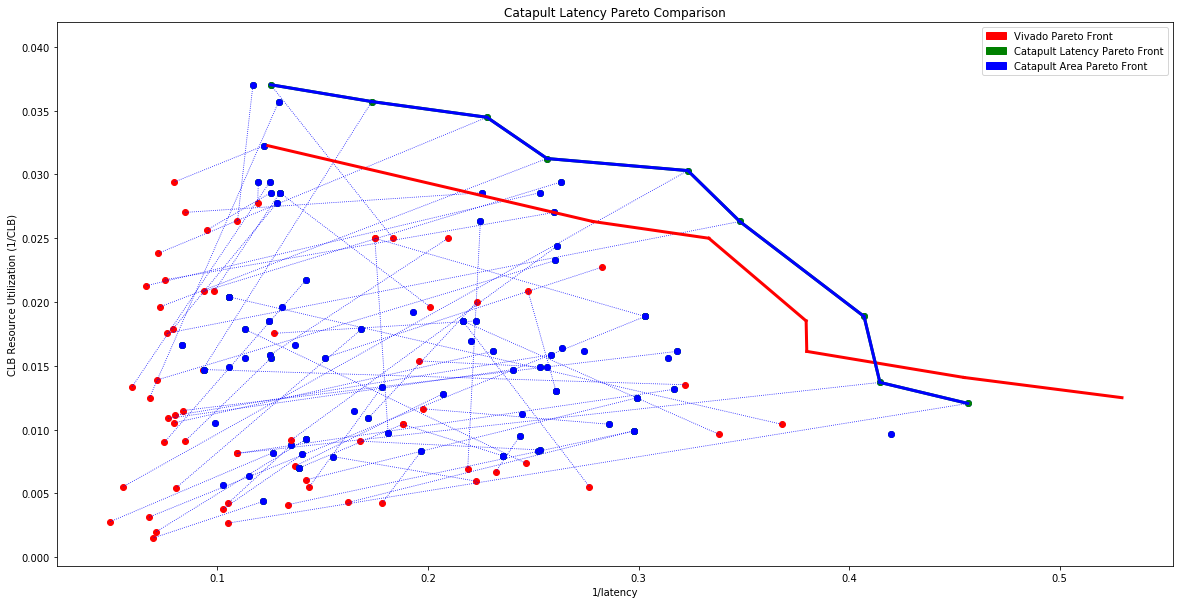

In [23]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    plt.scatter(x=y_pareto3[i][0], y=y_pareto3[i][1], c='b')
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li[i][2].empty==False:
        b=li[i][2].get_values()        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='g') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto3[i][0], 1/(a[0][6])],[y_pareto3[i][1], 1/a[0][7]],'b:',linewidth=0.8)

    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto3[i][0], 1/(b[0][8])],[y_pareto3[i][1], 1/b[0][9]],'r:',linewidth=0.8)
        
for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/c_areadfx_copy.loc[li2[i][1]]['obj1'], y=1/c_areadfx_copy.loc[li2[i][1]]['obj2'], c='g')
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/c_areadfx_copy.loc[li2[i][1]]['obj1'], y=1/c_areadfx_copy.loc[li2[i][1]]['obj2'], c='g')        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/c_areadfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][6])],[1/c_areadfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][7]],'b:',linewidth=0.8)

    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/c_areadfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/c_areadfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)
red_data = mpatches.Patch(color='red', label='Vivado Pareto')
green_data = mpatches.Patch(color='green', label='Catapult Latency Points')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Points')
for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'red',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
red_data = mpatches.Patch(color='red', label='Vivado Pareto Front ')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Catapult Latency Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')

In [24]:


viv_adrs=[]
for index,row in vivdfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto1_index)):
        a=euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])
        if a<min_val:
            min_val=a
    viv_adrs.append(min_val)



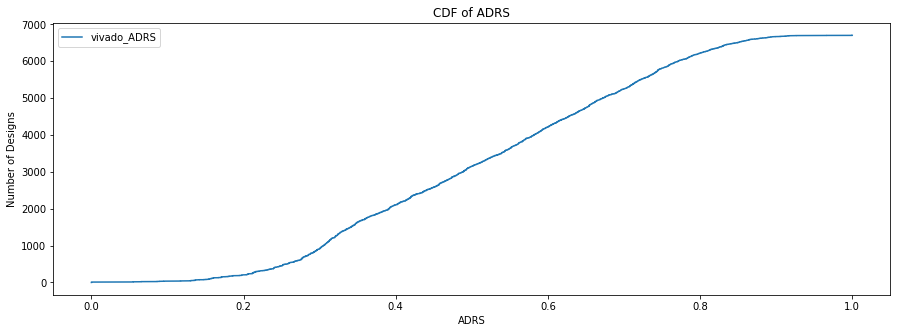

In [31]:


sorted_viv_adrs=np.sort(viv_adrs)

max_val=sorted_viv_adrs.max()
sorted_viv_adrs=sorted_viv_adrs/max_val
plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_viv_adrs, sorted_viv_adrs[[-1]]]),np.arange(sorted_viv_adrs.size+1),label='vivado_ADRS')
plt.xlabel('ADRS')
plt.ylabel('Number of Designs')
plt.title('CDF of ADRS')


plt.legend()



In [26]:
c_lat_adrs=[]
for index,row in c_latdfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto2_index)):
        a=euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])
        if a<min_val:
            min_val=a
    c_lat_adrs.append(min_val)

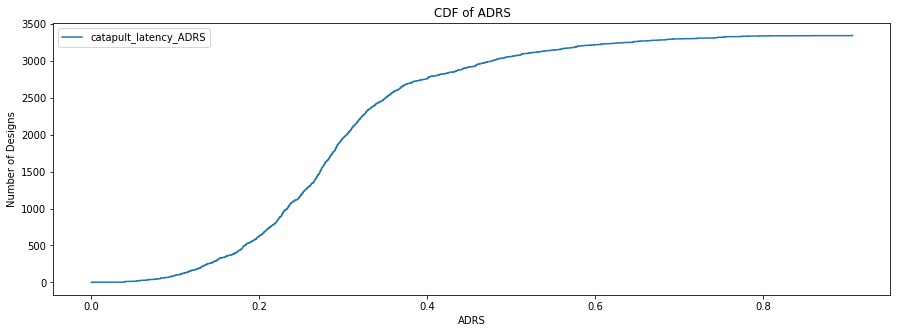

In [32]:
sorted_c_lat_adrs=np.sort(c_lat_adrs)

sorted_c_lat_adrs=sorted_c_lat_adrs/max_val
plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_c_lat_adrs, sorted_c_lat_adrs[[-1]]]),np.arange(sorted_c_lat_adrs.size+1),label='catapult_latency_ADRS')
plt.xlabel('ADRS')
plt.ylabel('Number of Designs')
plt.title('CDF of ADRS')


plt.legend()

In [28]:
c_area_adrs=[]
for index,row in c_areadfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto3_index)):
        a=euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])
        if a<min_val:
            min_val=a
    c_area_adrs.append(min_val)

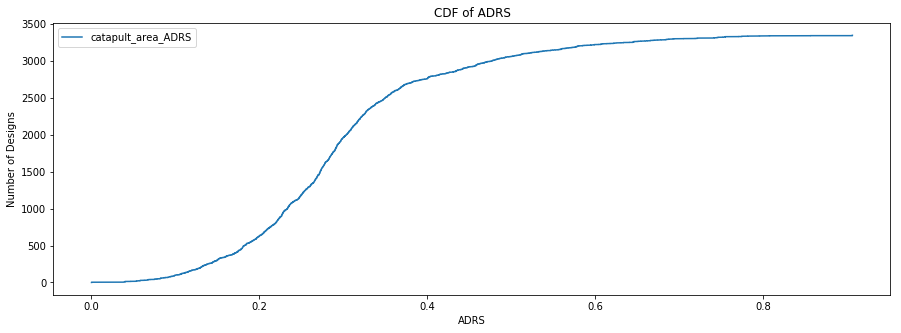

In [33]:
sorted_c_area_adrs=np.sort(c_area_adrs)
sorted_c_area_adrs=sorted_c_area_adrs/max_val

plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_c_area_adrs, sorted_c_area_adrs[[-1]]]),np.arange(sorted_c_area_adrs.size+1),label='catapult_area_ADRS')
plt.xlabel('ADRS')
plt.ylabel('Number of Designs')
plt.title('CDF of ADRS')


plt.legend()

In [30]:
sorted_viv_adrs.max(),sorted_c_lat_adrs.max(),sorted_c_area_adrs.max()

(0.101732042625149, 0.09221229758574065, 0.09221229758574065)